# Two dimensional Bloch states

## Band structure calculation

In this exercise we will get the band structure of the 2D Photonic crystal as depicted below:

<img src="media/2D_phot_crystal.png" width="700">

First of all,  let's  define modules and plottig preferences:

In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

We fix the resolution:

In [2]:
resolution = 128

Now we fix the mediums:

In [3]:
Med_1 = mp.Medium(index=np.sqrt(8.9)) #as in alumina
Med_2 = mp.Medium(index=1)

Next, we set the geometry:

In [4]:
a = 1 # arbitrary units
sc = 1 * a  

geometry_lattice = mp.Lattice(size=mp.Vector3(sc,sc,0))

In [5]:
r  = 0.2 * a
geometry = [mp.Cylinder(r, material=Med_1)]

We check if it makes sense:

In [6]:
sim = mp.Simulation(resolution=resolution,
                    cell_size= mp.Vector3(sc,sc,0),
                    geometry=geometry)
sim.init_sim()
eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 6.19888e-06 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 128
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
time for set_epsilon = 0.056792 s
-----------


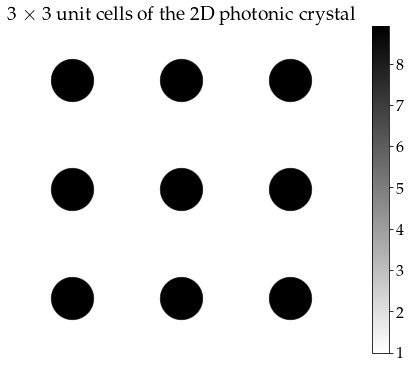

In [7]:
eps = np.concatenate([eps_data,eps_data,eps_data]) #three unit cells in one direction
eps = np.concatenate([eps.T,eps.T,eps.T]) # three fold repetition of a column of unit cells

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('3 $\\times$ 3 unit cells of the 2D photonic crystal')
pos1 = ax1.imshow(eps, interpolation='spline36', cmap='binary')
ax1.axis('off')
fig1.colorbar(pos1, ax=ax1)

It seems to be alright!

Now we set up the $k$-space:

In [8]:
num_bands = 8

num_k = 20

k_points = [mp.Vector3(),          # Gamma
            mp.Vector3(0.5),       # X
            mp.Vector3(0.5, 0.5),  # M
            mp.Vector3()]          # Gamma

k_points = mp.interpolate(num_k, k_points)

We can now call the run function to compute the bands:

In [9]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 128 x 128 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
64 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.023809523809523808, 0.0, 0.0>
  Vector3<0.047619047619047616, 0.0, 0.0>
  Vector3<0.07142857142857142, 0.0, 0.0>
  Vector3<0.09523809523809523, 0.0, 0.0>
  Vector3<0.11904761904761904, 0.0, 0.0>
  Vector3<0.14285714285714285, 0.0, 0.0>
  Vector3<0.16666666666666666, 0.0, 0.0>
  Vector3<

Now, we have passed everything down to `ms_2D_pc.py` and run. We then generate some **band files** to plot them later. This was done by means of the `grep` command, i.e.: `grep freqs: 2D_pc_data.dat > 2D_pc_bands.dat`. To access the file:

In [10]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/02_2D_Photonic_Crystals/2D_Bloch_States


In [11]:
f = np.genfromtxt(path+"/data/2D_pc_bands.dat", delimiter=",")[:-1,:]

In [12]:
print(np.shape(f))

(124, 18)


In [13]:
124/3

41.333333333333336

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


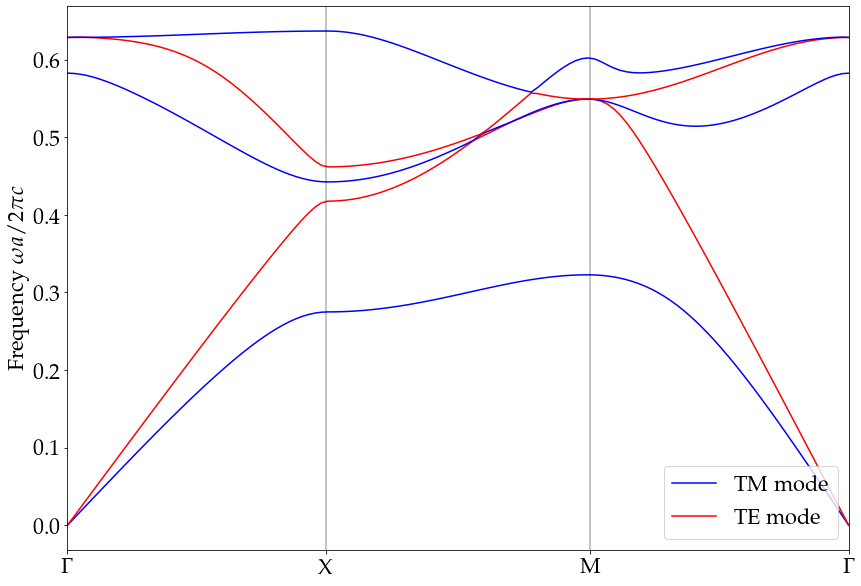

In [14]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(14,10))
title = "Photonic bands structure for 2D PC with $\\varepsilon_1$=8.9 cylinders in air with $r=0.2a$"
ax.plot(np.linspace(0,len(f[:,-10]), len(f[:,-10])), f[:,-12], c='b' , label='TM mode') # TM mode
ax.plot(np.linspace(0,len(f[:,-10]), len(f[:,-10])), f[:,-11], c='r', label='TE mode') # TE mode
ax.plot(np.linspace(0,len(f[:,-10]), len(f[:,-10])), f[:,-10], c='b' ) # TM mode
ax.plot(np.linspace(0,len(f[:,-10]), len(f[:,-10])), f[:,-9], c='r' ) # TE mode
ax.plot(np.linspace(0,len(f[:,-10]), len(f[:,-10])), f[:,-8], c='b') # TM mode
plt.axvline(x=41, c='black', alpha=0.3)
plt.axvline(x=83, c='black', alpha=0.3)

#ax.set_title(title)

ax.set_xticks([0, 41, 83, 124])
ax.set_xticklabels(['$\\Gamma$', 'X', 'M','$\\Gamma$'])
ax.set_xlim([0,124])
ax.set_xlabel("")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.legend(loc=4)

In [15]:
fig.savefig("media/square_dielectric_columns_band_structure.pdf")

Now that we have the correct bands let's get we can plot the fields for the modes.

## Electromagnetic field calculation

In [16]:
resolution = 512
md = mpb.MPBData(rectify=True, periods=3, resolution=resolution)

In [17]:
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

epsilon: 1-8.9, mean 1.99274, harm. mean 1.12896, 13.1897% > 1, 12.5664% "fill"


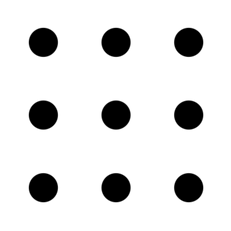

In [18]:
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

In [19]:
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.5,0.5)],
    resolution=resolution,
    num_bands=num_bands
)

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 512 x 512 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.5, 0.0>
elapsed time for initialization: 0.3560214042663574
solve_kpoint (0.5,0.5,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 15 iterations.
tmfreqs:, 1, 0.5, 0.5, 0, 0.707107, 0.322396, 0.548832, 0.548832, 0.693589, 0.922182, 0.922182, 0.981617, 0.989611
elapsed time for k poi

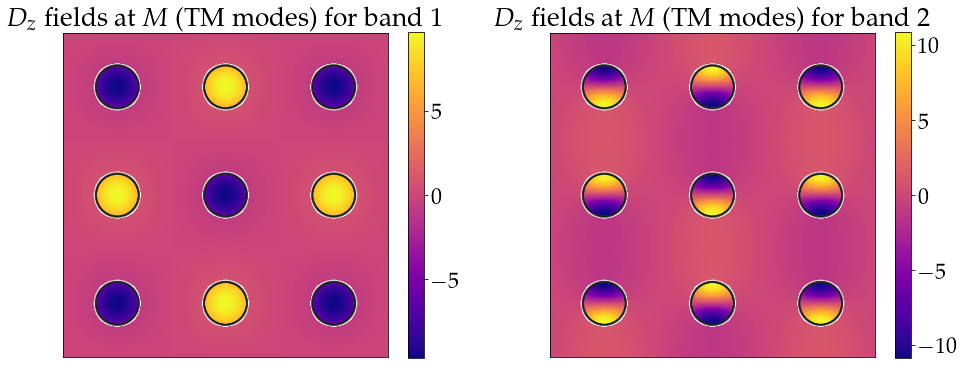

In [20]:
dfields = []

def get_dfields(ms, band):
    dfields.append(ms.get_dfield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0.5, 0.5), mpb.fix_dfield_phase,
          get_dfields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in dfields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

fig2, ax2 = plt.subplots(1,2,figsize=(16,6))
ax2[0].set_title('$D_z$ fields at $M$ (TM modes) for band 1')
ax2[1].set_title('$D_z$ fields at $M$ (TM modes) for band 2')
ax2[0].contour(converted_eps.T, cmap='binary')
ax2[1].contour(converted_eps.T, cmap='binary')
posd1 = ax2[0].imshow(np.real(converted[0]).T, interpolation='spline36', cmap='plasma')
posd2 = ax2[1].imshow(np.real(converted[1]).T, interpolation='spline36', cmap='plasma')
ax2[0].set_xticks([])
ax2[0].set_xticklabels([]);
ax2[0].set_yticks([])
ax2[0].set_yticklabels([]);
ax2[1].set_xticks([])
ax2[1].set_xticklabels([]);
ax2[1].set_yticks([])
ax2[1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[0])
fig.colorbar(posd2,ax=ax2[1])

In [21]:
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.5,0.0)],
    resolution=resolution,
    num_bands=num_bands
)

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 512 x 512 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.33427929878234863
solve_kpoint (0.5,0,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 16 iterations.
tmfreqs:, 1, 0.5, 0, 0, 0.5, 0.274707, 0.442518, 0.635957, 0.772239, 0.783949, 0.943092, 0.981342, 1.13638
elapsed time for k point: 35.31

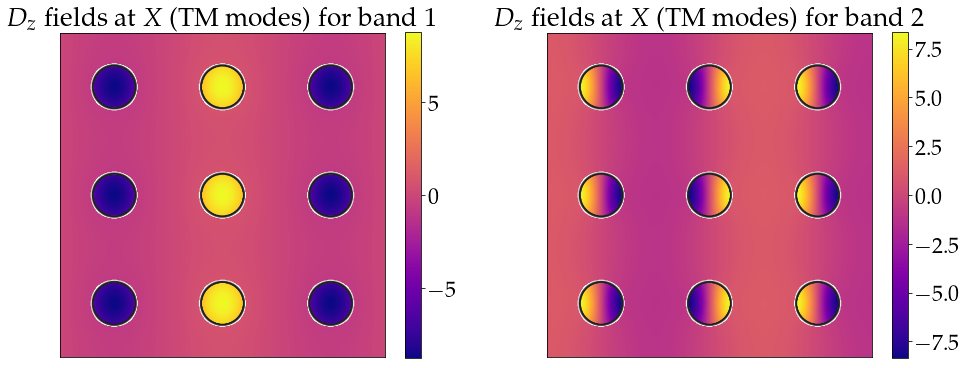

In [22]:
dfields = []

def get_dfields(ms, band):
    dfields.append(ms.get_dfield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0.5,0.0), mpb.fix_dfield_phase,
          get_dfields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in dfields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

fig2, ax2 = plt.subplots(1,2,figsize=(16,6))
ax2[0].set_title('$D_z$ fields at $X$ (TM modes) for band 1')
ax2[1].set_title('$D_z$ fields at $X$ (TM modes) for band 2')
ax2[0].contour(converted_eps.T, cmap='binary')
ax2[1].contour(converted_eps.T, cmap='binary')
posd1 = ax2[0].imshow(np.imag(converted[0]).T, interpolation='spline36', cmap='plasma')
posd2 = ax2[1].imshow(np.imag(converted[1]).T, interpolation='spline36', cmap='plasma')
ax2[0].set_xticks([])
ax2[0].set_xticklabels([]);
ax2[0].set_yticks([])
ax2[0].set_yticklabels([]);
ax2[1].set_xticks([])
ax2[1].set_xticklabels([]);
ax2[1].set_yticks([])
ax2[1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[0])
fig.colorbar(posd2,ax=ax2[1])

In [23]:
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.0, 0.0)],
    resolution=resolution,
    num_bands=num_bands
)

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 512 x 512 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.32503533363342285
solve_kpoint (0,0,0):
Solving for bands 2 to 8...
Finished solving for bands 2 to 8 after 17 iterations.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.582311, 0.627805, 0.627805, 0.889841, 0.972003, 1.06563, 1.12409
elapsed time for k point: 30.593737363815308


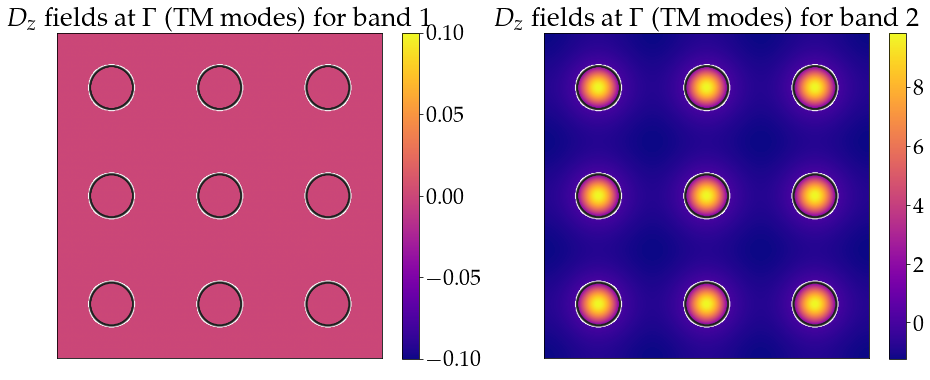

In [24]:
dfields = []

def get_dfields(ms, band):
    dfields.append(ms.get_dfield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0.0,0.0), mpb.fix_dfield_phase,
          get_dfields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in dfields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

fig2, ax2 = plt.subplots(1,2,figsize=(16,6))
ax2[0].set_title('$D_z$ fields at $\\Gamma$ (TM modes) for band 1')
ax2[1].set_title('$D_z$ fields at $\\Gamma$ (TM modes) for band 2')
ax2[0].contour(converted_eps.T, cmap='binary')
ax2[1].contour(converted_eps.T, cmap='binary')
posd1 = ax2[0].imshow(np.real(converted[0]), interpolation='spline36', cmap='plasma')
posd2 = ax2[1].imshow(np.real(converted[1]), interpolation='spline36', cmap='plasma')
ax2[0].set_xticks([])
ax2[0].set_xticklabels([]);
ax2[0].set_yticks([])
ax2[0].set_yticklabels([]);
ax2[1].set_xticks([])
ax2[1].set_xticklabels([]);
ax2[1].set_yticks([])
ax2[1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[0])
fig.colorbar(posd2,ax=ax2[1])

As we can see the field associated to the lowest TM mode is mostly concentrated in the high dielectric regions. For the air band a nodal plane cuts through the dielectric columns, expelling some of the displacement field amplitude from the high dielectric region.

If we would inspect the TE modes, the contrast of the concentration factors would not be as strong. The contrast would be higher if there was a continuous dielectric pathway between rods that could contain the field lines of **D**.

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 512 x 512 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.5, 0.0>
elapsed time for initialization: 0.3142540454864502
solve_kpoint (0.5,0.5,0):
Solving for bands 1 to 8...
Finished solving for bands 1 to 8 after 16 iterations.
tmfreqs:, 1, 0.5, 0.5, 0, 0.707107, 0.322396, 0.548832, 0.548832, 0.693589, 0.922182, 0.922182, 0.981617, 0.989611
elapsed time for k poi

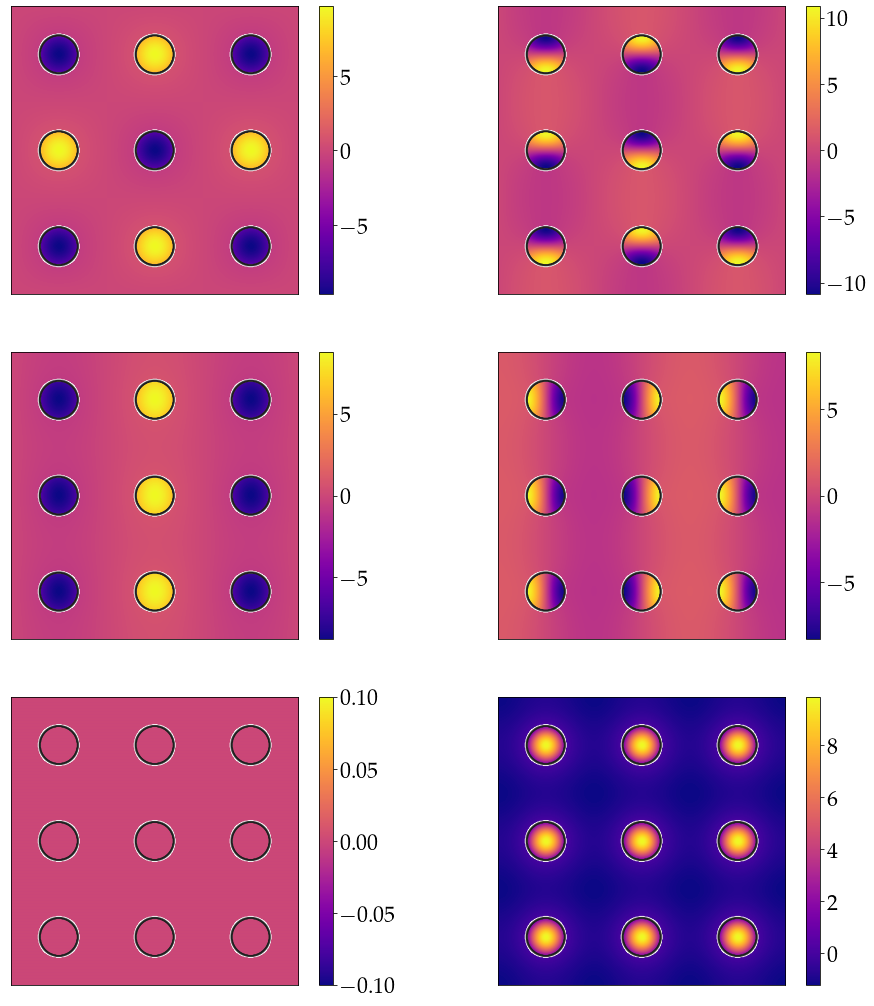

In [27]:
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.5,0.5)],
    resolution=resolution,
    num_bands=num_bands
)

dfields = []

def get_dfields(ms, band):
    dfields.append(ms.get_dfield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0.5, 0.5), mpb.fix_dfield_phase,
          get_dfields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in dfields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))
    
fig2, ax2 = plt.subplots(3,2,figsize=(16,18))
#ax2[0,0].set_title('$D_z$ fields at $M$ (TM modes) for band 1')
#ax2[0,1].set_title('$D_z$ fields at $M$ (TM modes) for band 2')
ax2[0,0].contour(converted_eps.T, cmap='binary')
ax2[0,1].contour(converted_eps.T, cmap='binary')
posd1 = ax2[0,0].imshow(np.real(converted[0]).T, interpolation='spline36', cmap='plasma')
posd2 = ax2[0,1].imshow(np.real(converted[1]).T, interpolation='spline36', cmap='plasma')
ax2[0,0].set_xticks([])
ax2[0,0].set_xticklabels([]);
ax2[0,0].set_yticks([])
ax2[0,0].set_yticklabels([]);
ax2[0,1].set_xticks([])
ax2[0,1].set_xticklabels([]);
ax2[0,1].set_yticks([])
ax2[0,1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[0,0])
fig.colorbar(posd2,ax=ax2[0,1])

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.5,0.0)],
    resolution=resolution,
    num_bands=num_bands
)

dfields = []

def get_dfields(ms, band):
    dfields.append(ms.get_dfield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0.5,0.0), mpb.fix_dfield_phase,
          get_dfields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in dfields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

#ax2[1,0].set_title('$D_z$ fields at $X$ (TM modes) for band 1')
#ax2[1,1].set_title('$D_z$ fields at $X$ (TM modes) for band 2')
ax2[1,0].contour(converted_eps.T, cmap='binary')
ax2[1,1].contour(converted_eps.T, cmap='binary')
posd1 = ax2[1,0].imshow(np.imag(converted[0]).T, interpolation='spline36', cmap='plasma')
posd2 = ax2[1,1].imshow(np.imag(converted[1]).T, interpolation='spline36', cmap='plasma')
ax2[1,0].set_xticks([])
ax2[1,0].set_xticklabels([]);
ax2[1,0].set_yticks([])
ax2[1,0].set_yticklabels([]);
ax2[1,1].set_xticks([])
ax2[1,1].set_xticklabels([]);
ax2[1,1].set_yticks([])
ax2[1,1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[1,0])
fig.colorbar(posd2,ax=ax2[1,1])

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=[mp.Vector3(0.0, 0.0)],
    resolution=resolution,
    num_bands=num_bands
)

dfields = []

def get_dfields(ms, band):
    dfields.append(ms.get_dfield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0.0,0.0), mpb.fix_dfield_phase,
          get_dfields))

# Create an MPBData instance to transform the dfields
md = mpb.MPBData(rectify=True, resolution=resolution, periods=3)

converted = []
for f in dfields:
    # Get just the z component of the dfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

#ax2[2,0].set_title('$D_z$ fields at $\\Gamma$ (TM modes) for band 1')
#ax2[2,1].set_title('$D_z$ fields at $\\Gamma$ (TM modes) for band 2')
ax2[2,0].contour(converted_eps.T, cmap='binary')
ax2[2,1].contour(converted_eps.T, cmap='binary')
posd1 = ax2[2,0].imshow(np.real(converted[0]), interpolation='spline36', cmap='plasma')
posd2 = ax2[2,1].imshow(np.real(converted[1]), interpolation='spline36', cmap='plasma')
ax2[2,0].set_xticks([])
ax2[2,0].set_xticklabels([]);
ax2[2,0].set_yticks([])
ax2[2,0].set_yticklabels([]);
ax2[2,1].set_xticks([])
ax2[2,1].set_xticklabels([]);
ax2[2,1].set_yticks([])
ax2[2,1].set_yticklabels([]);
fig.colorbar(posd1,ax=ax2[2,0])
fig.colorbar(posd2,ax=ax2[2,1])